In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os
import sys
import scipy.stats as stats
%matplotlib inline

#### Importing and cleaning data

In [2]:
# Import adult.data into a dataframe
df = pd.read_csv('adult.data', header=None)
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship','race', 'sex', 'capital-gain', 'capital-loss','hours-per-week','native-country','salary']
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Clean the dataset by dropping rows with ? as imputing them wouldn't result in a meaningful data set
clean_df = df.replace(' ?', np.NaN).dropna()
clean_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Finding correlation between factors influencing salary

In [4]:
# Find number of people with salary >50K(0) and <50K(1)
log_df = clean_df.copy()
log_df.loc[clean_df.salary.str.strip() == "<=50K", 'salary'] = 0
log_df.loc[clean_df.salary.str.strip() == ">50K", 'salary'] = 1
log_df['salary'].value_counts()
log_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

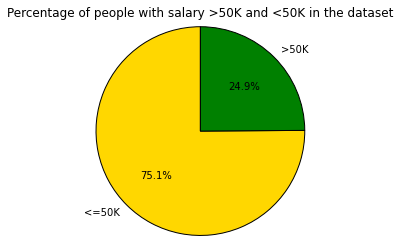

In [5]:
# Pie chart of the number of people with salary >50K and <50K
plt.pie(log_df.salary.value_counts(), labels=['<=50K', '>50K'], autopct='%1.1f%%', startangle=90, colors=['gold','green'], radius=1.2, textprops={'fontsize': '10'}, wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.title('Percentage of people with salary >50K and <50K in the dataset')
plt.show()

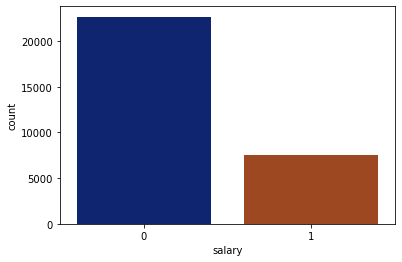

<Figure size 432x288 with 0 Axes>

In [6]:
# Count of  number of people with salary >50K and <50K in the dataset
sns.countplot(x='salary', data=log_df, palette='dark')
plt.show()
plt.savefig('count_plot')

In [7]:
#Weight Analysis
below = log_df[log_df['salary'] == 0]
above = log_df[log_df['salary'] == 1]

countbelow = below.shape[0]
countabove = above.shape[0]
print("Percentage below 50k: ", (countbelow/(countbelow + countabove))*100)

sumweightbelow = below['fnlwgt'].sum()
sumweightabove = above['fnlwgt'].sum()
print("Percentage weight below 50k: ", (sumweightbelow/(sumweightbelow + sumweightabove))*100)


Percentage below 50k:  75.10775147536636
Percentage weight below 50k:  75.32335207448135


Calculate the mean of the numerical variables based on the salary categories - 0 is <=50k and 1 is >50k. We can see that the average "age" is about 36 and 44 respectively and are close enough similar to other attributes except for "capital-gain" and "capital-loss". So, these two attributes could have more impact on the "salary" dependent variable. Rest of the numerical variables can be ignored.

In [8]:
log_df.groupby('salary').mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
salary,,,,,,
0,36.60806,190338.646729,9.629116,148.893838,53.448000,39.348592
1,43.95911,188149.962174,11.606420,3937.679808,193.750666,45.706580


Now let's perform the analysis on the categorical variables

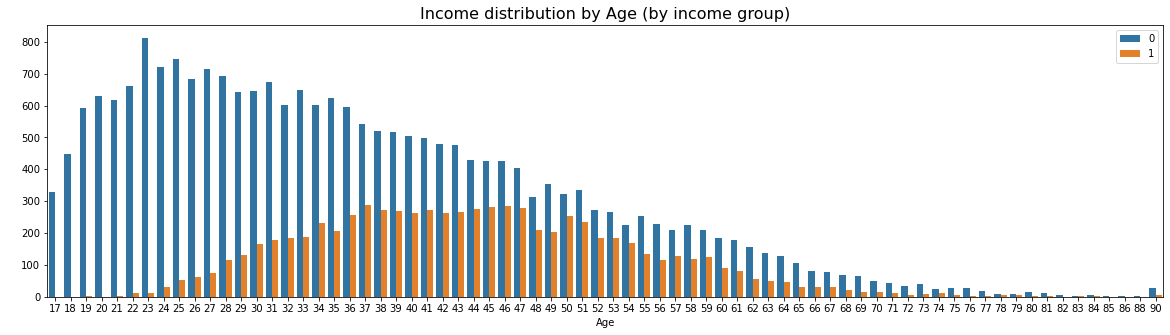

In [17]:
#Age Analysis: It is clearly seen from the diagrame below that age has a greater influence on the salary.
fig = plt.figure(figsize=(20,5))
ax_age = sns.countplot(data=log_df, x='age', hue='salary')
ax_age.set_title("Income distribution by Age (by income group)", loc='center', fontsize=16)
ax_age.set_xlabel("Age")
ax_age.set_ylabel(" ")
ax_age.legend(loc="upper right") 

In [18]:
log_df.groupby('sex').mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
sex,,,,,,
Female,36.883459,185926.150480,10.098651,570.176753,60.938765,36.932222
Male,39.184004,191650.246075,10.132188,1342.476546,101.540137,42.850687


Text(0.5, 1.0, 'Salary Range based on Sex')

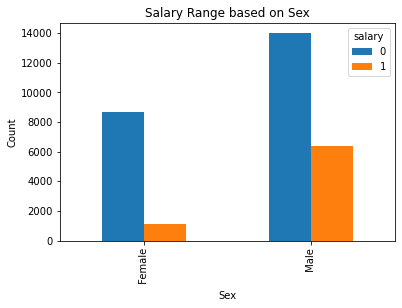

In [19]:
#Sex Analysis: It can be seen that sex has an important role in determining the salary, especially in males.
pd.crosstab(log_df['sex'], log_df['salary']).plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Salary Range based on Sex')

In [20]:
#Compute the percentage of male and female earning below 50k.
male_df = log_df[log_df['sex'] == ' Male']
male_l50k_df = log_df[(log_df['sex'] == ' Male') & (log_df['salary'] == 0)]
female_df = log_df[log_df['sex'] == ' Female']
female_l50k_df = log_df[(log_df['sex'] == ' Female') & (log_df['salary'] == 0)]
print("Male & Female Percentage with salary <=50k: ", round((male_l50k_df.shape[0]/male_df.shape[0])*100,2), ", ", round((female_l50k_df.shape[0]/female_df.shape[0])*100,2))

Male & Female Percentage with salary <=50k:  68.62 ,  88.63


Text(0.5, 1.0, 'Salary Range based on Marital-Status')

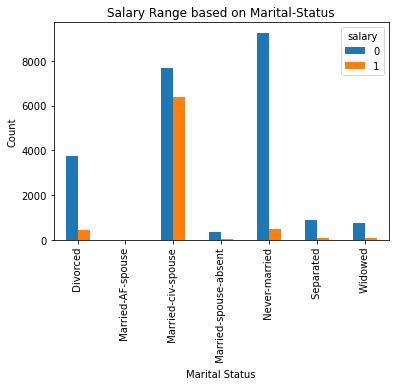

In [21]:
#Marital Status Analysis: This also seems to have a greater impact on the salary, especially of type "Married-civ-spouse".
pd.crosstab(log_df['marital-status'], log_df['salary']).plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Salary Range based on Marital-Status')

In [22]:
#Calculate percent of "Never-married" people with salary <=50k.
ms_df = log_df[log_df['marital-status'] == ' Never-married']
ms_l50k_df = log_df[(log_df['marital-status'] == ' Never-married') & (log_df['salary'] == 0)]
print("Percentage of Never-married people with salary <=50k: ", round(((ms_l50k_df.shape[0] / ms_df.shape[0] )*100),2))

Percentage of Never-married people with salary <=50k:  95.17


Text(0.5, 1.0, 'Salary Range based on Work Class')

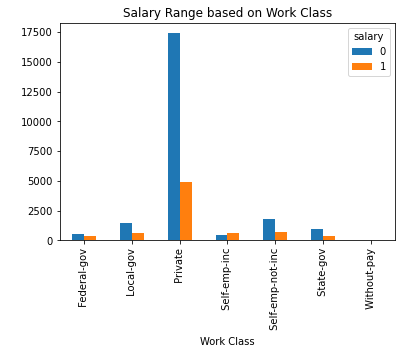

In [23]:
#Work Class Analysis: This might not be an important attribute that would greatly impact the salary. 
pd.crosstab(log_df['workclass'], log_df['salary']).plot(kind='bar')
plt.xlabel('Work Class')
plt.ylabel(' ')
plt.title('Salary Range based on Work Class', loc='center', fontsize=12)

In [24]:
#Private work class seems to be in large number for salary <=50k. So, let's evaluate the percentage.
countAll  = log_df[log_df['workclass'] == " Private"].shape[0]
countPrivate = log_df[(log_df['workclass'] == " Private") & (log_df['salary'] == 0)].shape[0]
print("Percentage of Private Company Employees with salary <=50k: ", round(((countPrivate / countAll )*100),2))

Percentage of Private Company Employees with salary <=50k:  78.12


Text(0.5, 1.0, 'Salary Range based on Education')

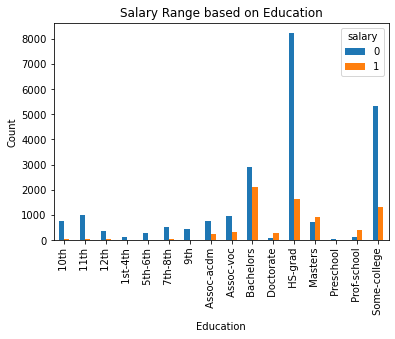

In [25]:
#Education Analysis: It can be seen that higher the education level, greater the number of people earning a salary of >50k.
pd.crosstab(log_df['education'], log_df['salary']).plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Salary Range based on Education')

Text(0.5, 1.0, 'Salary Range based on Occupation')

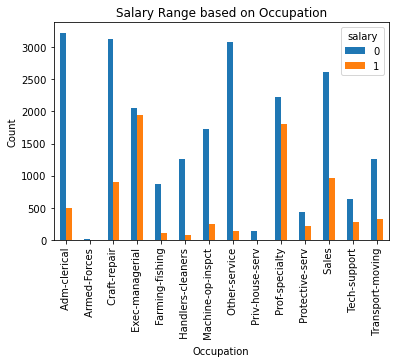

In [26]:
#Occupation Analysis: This appears to have a good impact on the salary.
pd.crosstab(log_df['occupation'], log_df['salary']).plot(kind='bar')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Salary Range based on Occupation')

Text(0.5, 1.0, 'Salary Range based on Relationship')

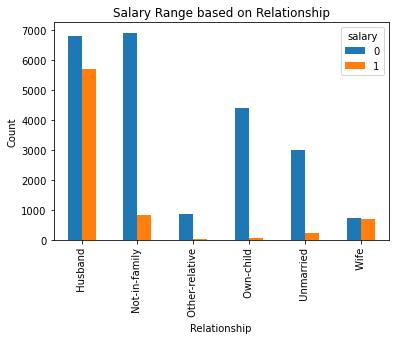

In [27]:
#Relationship Analysis: This appears to have a good impact on the salary.
pd.crosstab(log_df['relationship'], log_df['salary']).plot(kind='bar')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.title('Salary Range based on Relationship')

Text(0.5, 1.0, 'Salary Range based on Race')

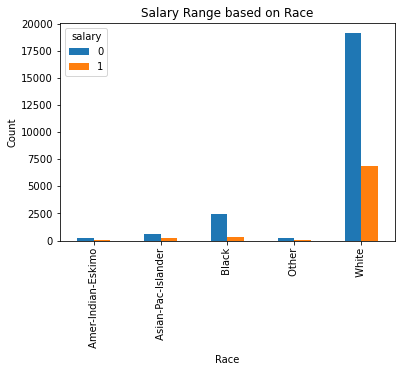

In [28]:
#Race Analysis: This appears to have greater impact on the salary
pd.crosstab(log_df['race'], log_df['salary']).plot(kind='bar')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Salary Range based on Race')

Text(0.5, 1.0, 'Salary Range based on Native Country')

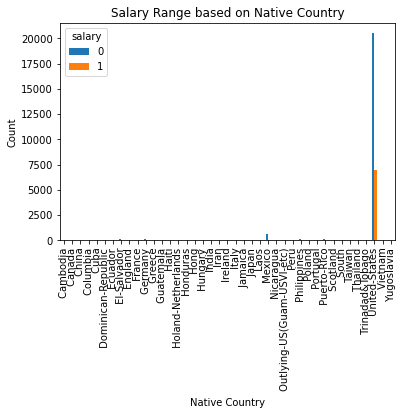

In [29]:
#Native Country Analysis: This doesn't appear to have a clear info of the impact on the salary.
pd.crosstab(log_df['native-country'], log_df['salary']).plot(kind='bar')
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.title('Salary Range based on Native Country')

In [30]:
#Based on the above analysis, we can consider the following variable of the dataset for building the model.
#cols = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
cols = ['age', 'education', 'marital-status', 'occupation', 'relationship','race', 'sex', 'capital-gain', 'capital-loss']

In [31]:
print("Pearson Correlation: ")
print(log_df.corr(method='pearson'))

Pearson Correlation: 
                     age    fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.076511       0.043526      0.080154      0.060165   
fnlwgt         -0.076511  1.000000      -0.044992      0.000422     -0.009750   
education-num   0.043526 -0.044992       1.000000      0.124416      0.079646   
capital-gain    0.080154  0.000422       0.124416      1.000000     -0.032229   
capital-loss    0.060165 -0.009750       0.079646     -0.032229      1.000000   
hours-per-week  0.101599 -0.022886       0.152522      0.080432      0.052417   

                hours-per-week  
age                   0.101599  
fnlwgt               -0.022886  
education-num         0.152522  
capital-gain          0.080432  
capital-loss          0.052417  
hours-per-week        1.000000  


Now that the dependent variables are determined, a logistic regression model can be built on the training dataset and the salary category (<=50k and >50k) can be predicted. Model accuracy can also be determined utilizing the confusion matrix.

In [38]:
X = log_df[cols]
X_dummies = pd.get_dummies(X)
y = log_df['salary']

X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
y1 = y_train.to_numpy().astype(int)
logreg.fit(X_train.to_numpy(), y1)
y_pred=logreg.predict(X_test.to_numpy())
y_pred
#import statsmodels.api as sm
#logit_model=sm.Logit(y1,X_train.to_numpy())
#result=logit_model.fit()
#print(result.summary2())


c:\Users\vasan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0])

In [39]:
X_dummies = pd.get_dummies(X)
print("Pearson Correlation: ")
print(X_dummies.corr(method='pearson'))

Pearson Correlation: 
                                            age  capital-gain  capital-loss  \
age                                    1.000000      0.080154      0.060165   
capital-gain                           0.080154      1.000000     -0.032229   
capital-loss                           0.060165     -0.032229      1.000000   
education_ 10th                       -0.006877     -0.015712     -0.010794   
education_ 11th                       -0.087744     -0.022410     -0.016816   
education_ 12th                       -0.055031     -0.012555     -0.015439   
education_ 1st-4th                     0.033400     -0.009367     -0.006071   
education_ 5th-6th                     0.024007     -0.012223     -0.004092   
education_ 7th-8th                     0.096015     -0.015692     -0.007512   
education_ 9th                         0.017577     -0.012327     -0.018181   
education_ Assoc-acdm                 -0.016297     -0.013484      0.002762   
education_ Assoc-voc          

In [ ]:
pred_df = X_test.copy()
pred_df['salary'] = pd.Series(y_test, index=pred_df.index)
pred_df['predicted salary'] = pd.Series(y_pred, index=pred_df.index)
pred_df

In [ ]:
y1_test = y_test.to_numpy().astype(int)
cnf_matrix = metrics.confusion_matrix(y1_test, y_pred)
cnf_matrix

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Salary')
plt.xlabel('Predicted Salary')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred))
print("Precision:",metrics.precision_score(y1_test, y_pred))